In [18]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

#Number of subprocesses to be used for data loading
numworkers = 0

batch_size = 20

transform = transforms.ToTensor()

train_data = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = datasets.MNIST('MNIST_data/', download=True, train=False, transform = transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)


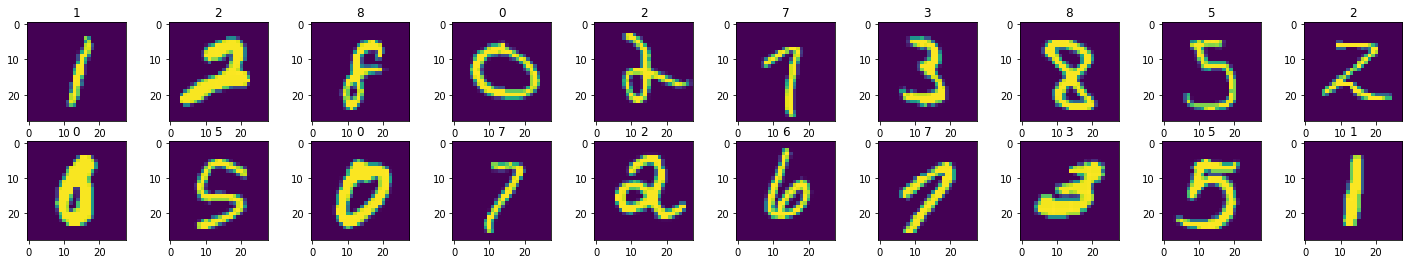

In [19]:
#Plot some images
images, labels = next(iter(train_loader))
images = images.numpy().squeeze()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1)
    ax.imshow(images[idx])
    ax.set_title(str(labels[idx].item()))

In [22]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [23]:
#Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 30

for epoch in range(epochs):
    train_loss = 0.0
    
    for data, target in train_loader :
        
        optimizer.zero_grad()
        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
    
    #Average loss over an epoch
    training_loss = train_loss/len(train_loader.dataset)
    print('--Epoch {}---'.format(epoch+1))
    print('Training Loss : ', training_loss)
        


--Epoch 1---
Training Loss :  0.9849764599824945
--Epoch 2---
Training Loss :  0.39968587615092593
--Epoch 3---
Training Loss :  0.3102157680702706
--Epoch 4---
Training Loss :  0.25760847617033866
--Epoch 5---
Training Loss :  0.22150013474964847
--Epoch 6---
Training Loss :  0.19842279845631372
--Epoch 7---
Training Loss :  0.17576968791832526
--Epoch 8---
Training Loss :  0.16157543718954548
--Epoch 9---
Training Loss :  0.14753101460216567
--Epoch 10---
Training Loss :  0.13650362409457253
--Epoch 11---
Training Loss :  0.12996655531258633
--Epoch 12---
Training Loss :  0.12041559839326267
--Epoch 13---
Training Loss :  0.11475014924452019
--Epoch 14---
Training Loss :  0.11052689809926475
--Epoch 15---
Training Loss :  0.10253734786311786
--Epoch 16---
Training Loss :  0.0972311836743805
--Epoch 17---
Training Loss :  0.0949608303620868
--Epoch 18---
Training Loss :  0.09204891969511907
--Epoch 19---
Training Loss :  0.08752025075481894
--Epoch 20---
Training Loss :  0.08457422974

Predicted =  [5 6 1 1 3 1 6 6 2 8 0 6 8 1 3 5 8 7 1 7]
Actual =  tensor([5, 6, 1, 1, 3, 1, 6, 6, 2, 8, 0, 6, 8, 1, 3, 5, 8, 7, 1, 7])


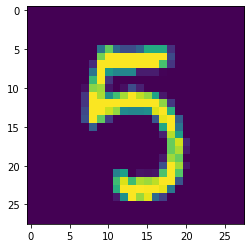

In [48]:
#Test the model
test_loss = 0.0
model.eval()

data, label = next(iter(test_loader))

output = model(data)
preds = np.argmax(output.detach().numpy(), axis=1)
print("Predicted = ", preds)
print("Actual = ", label)
equals = preds == label.numpy()
plt.imshow(data[0].numpy().squeeze())

In [37]:
accuracy = 0
test_loss = 0
batch_num = 0
for data, labels in test_loader:
    
    batch_num += 1
    output = model(data)
    test_loss += criterion(output, labels)
    preds = np.argmax(output.detach().numpy(), axis=1)
    equals = preds == labels.numpy()
    curr_accuracy = equals.mean()
    print("Accuracy on batch {} : {}".format(batch_num, curr_accuracy))
    accuracy += curr_accuracy

print('Test Loss : {}'.format(test_loss/len(test_loader)))
print('Overall Accuracy : {}'.format(accuracy/len(test_loader)))

Accuracy on batch 1 : 1.0
Accuracy on batch 2 : 1.0
Accuracy on batch 3 : 1.0
Accuracy on batch 4 : 1.0
Accuracy on batch 5 : 0.95
Accuracy on batch 6 : 1.0
Accuracy on batch 7 : 0.95
Accuracy on batch 8 : 1.0
Accuracy on batch 9 : 0.95
Accuracy on batch 10 : 1.0
Accuracy on batch 11 : 0.95
Accuracy on batch 12 : 1.0
Accuracy on batch 13 : 1.0
Accuracy on batch 14 : 1.0
Accuracy on batch 15 : 1.0
Accuracy on batch 16 : 1.0
Accuracy on batch 17 : 1.0
Accuracy on batch 18 : 1.0
Accuracy on batch 19 : 1.0
Accuracy on batch 20 : 0.9
Accuracy on batch 21 : 1.0
Accuracy on batch 22 : 0.95
Accuracy on batch 23 : 0.95
Accuracy on batch 24 : 0.95
Accuracy on batch 25 : 0.95
Accuracy on batch 26 : 1.0
Accuracy on batch 27 : 1.0
Accuracy on batch 28 : 1.0
Accuracy on batch 29 : 1.0
Accuracy on batch 30 : 1.0
Accuracy on batch 31 : 0.95
Accuracy on batch 32 : 1.0
Accuracy on batch 33 : 0.95
Accuracy on batch 34 : 1.0
Accuracy on batch 35 : 1.0
Accuracy on batch 36 : 1.0
Accuracy on batch 37 : 1.0


Accuracy on batch 294 : 0.9
Accuracy on batch 295 : 1.0
Accuracy on batch 296 : 0.95
Accuracy on batch 297 : 0.85
Accuracy on batch 298 : 1.0
Accuracy on batch 299 : 1.0
Accuracy on batch 300 : 1.0
Accuracy on batch 301 : 1.0
Accuracy on batch 302 : 1.0
Accuracy on batch 303 : 0.95
Accuracy on batch 304 : 0.95
Accuracy on batch 305 : 1.0
Accuracy on batch 306 : 1.0
Accuracy on batch 307 : 1.0
Accuracy on batch 308 : 0.95
Accuracy on batch 309 : 1.0
Accuracy on batch 310 : 0.95
Accuracy on batch 311 : 1.0
Accuracy on batch 312 : 1.0
Accuracy on batch 313 : 1.0
Accuracy on batch 314 : 1.0
Accuracy on batch 315 : 1.0
Accuracy on batch 316 : 1.0
Accuracy on batch 317 : 1.0
Accuracy on batch 318 : 0.95
Accuracy on batch 319 : 1.0
Accuracy on batch 320 : 1.0
Accuracy on batch 321 : 1.0
Accuracy on batch 322 : 0.95
Accuracy on batch 323 : 1.0
Accuracy on batch 324 : 1.0
Accuracy on batch 325 : 0.95
Accuracy on batch 326 : 1.0
Accuracy on batch 327 : 0.95
Accuracy on batch 328 : 1.0
Accuracy o